## 1. importing necessary libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Concept of Customer Churn

#### Customer churn in this dataset refers to whether a customer has stopped using the company’s services (churned = 1) or continues to stay (churned = 0). The dataset contains customer demographics, account information, and service usage patterns. By analyzing these features, we can identify which factors influence a customer’s decision to leave and build predictive models to reduce churn.

## 3. Problem Statement

#### The goal of this project is to analyze customer data to identify patterns and factors contributing to customer churn. Using this information, we aim to build predictive models that can accurately classify whether a customer is likely to churn or stay. This will help the business take proactive steps to improve customer retention and reduce revenue loss.

## 4. Loading Dataset

In [165]:
df = pd.read_csv('DATA/raw/customer_churn_data.csv')
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [166]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No
5879,CUST5879,Female,1,Yes,No,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.45,585.35,Yes


In [167]:
print(df.shape)

(5880, 21)


In [168]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [169]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [170]:
# Descriptive statistics
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5880.000000  5880.000000     5880.000000   5880.000000
mean        0.500680    36.549150       70.157779   2566.813165
std         0.500042    20.909674       28.804615   1910.017743
min         0.000000     1.000000       20.000000     20.030000
25%         0.000000    18.000000       45.717500   1020.217500
50%         1.000000    37.000000       70.155000   2136.445000
75%         1.000000    55.000000       95.457500   3767.665000
max         1.000000    72.000000      119.990000   8589.600000


In [171]:
# Checking for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [172]:
# Counting the number of duplicated rows in the DataFrame 
df.duplicated().value_counts()


False    5880
Name: count, dtype: int64

## 6. Understanding Data

1. The dataset has a total of 21 columns and 5880 rows.
2. The dataset has no null rows, and no duplicate values.
3. The column names are 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'.
4. The columns 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' are object type.
5. The columns 'SeniorCitizen' and 'tenure' are int type.
6. The columns 'MonthlyCharges' and 'TotalCharges' are float type.
7. There are no missing values in the dataset.
8. There are no duplicate values in the dataset.

In [173]:
#  finding unique values in each column
for col in df.columns:
    unque_values = df[col].nunique()
    print(f"{col}: {unque_values} unique values")


customerID: 5880 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 72 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 4439 unique values
TotalCharges: 5794 unique values
Churn: 2 unique values


In [174]:
def check_unique_values(df, cols=None):
    """Prints the unique values in each column of the DataFrame"""
    if cols is None:   # if no cols given, check all
        cols = df.columns
    
    for col in cols:
        print(f"Column: {col}")
        print(df[col].unique())
        print("-" * 40)

# Example usage
cols_to_check = [
    "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"
]

check_unique_values(df, cols_to_check)

Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------
Column: InternetService
['No' 'DSL' 'Fiber optic']
----------------------------------------
Column: OnlineSecurity
['No internet service' 'Yes' 'No']
----------------------------------------
Column: OnlineBackup
['No internet service' 'No' 'Yes']
----------------------------------------
Column: DeviceProtection
['No internet service' 'Yes' 'No']
----------------------------------------
Column: TechSupport
['No internet service' 'No' 'Yes']
----------------------------------------
Column: StreamingTV
['No internet service' 'Yes' 'No']
----------------------------------------
Column: StreamingMovies
['No internet service' 'No' 'Yes']
----------------------------------------
Column: Contract
['Month-to-month' 'One year' 'Two year']
----------------------------------------
Column: PaymentMethod
['Bank transfer' 'Mailed check' 'Electronic check' 'Credit card']
-------------------------------------

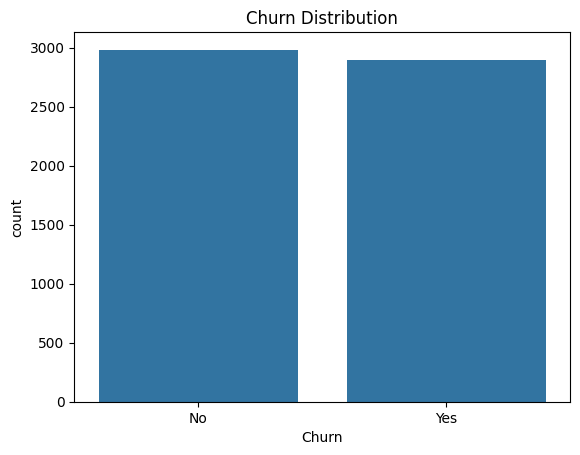

Churn
No     0.507143
Yes    0.492857
Name: proportion, dtype: float64


In [175]:
# Countplot
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Check imbalance
print(df["Churn"].value_counts(normalize=True))

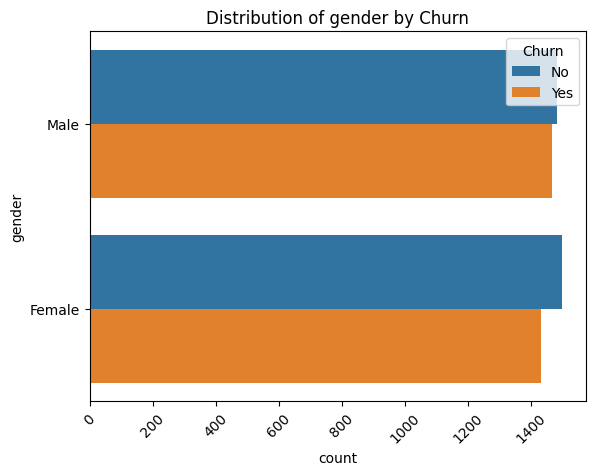

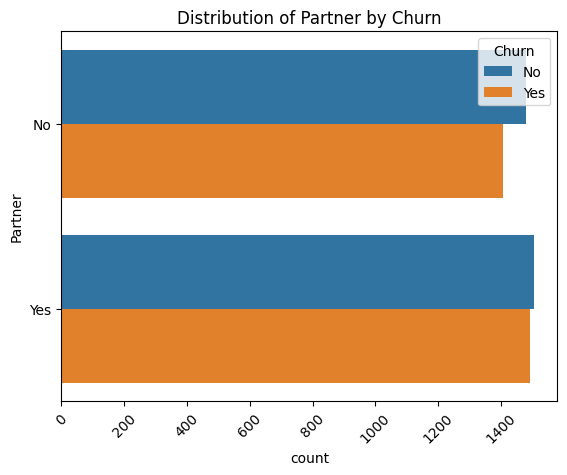

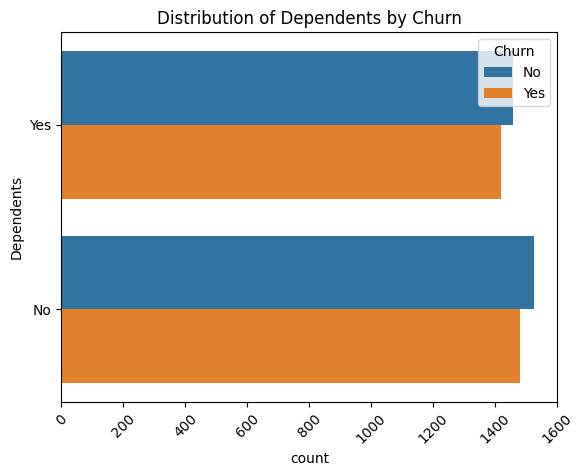

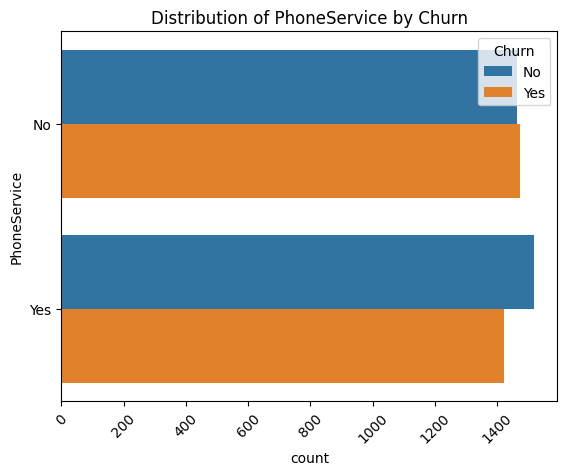

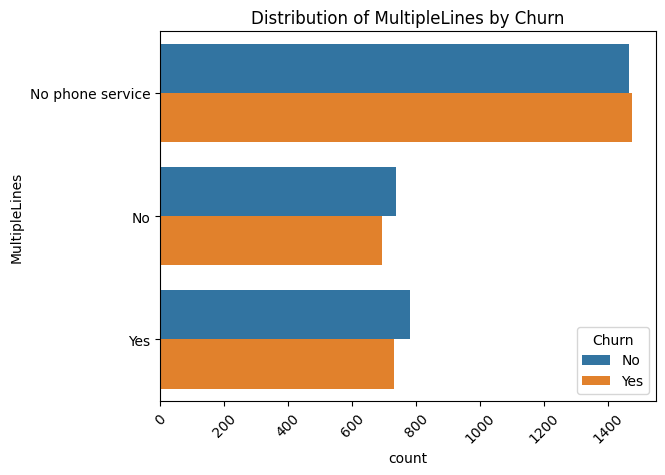

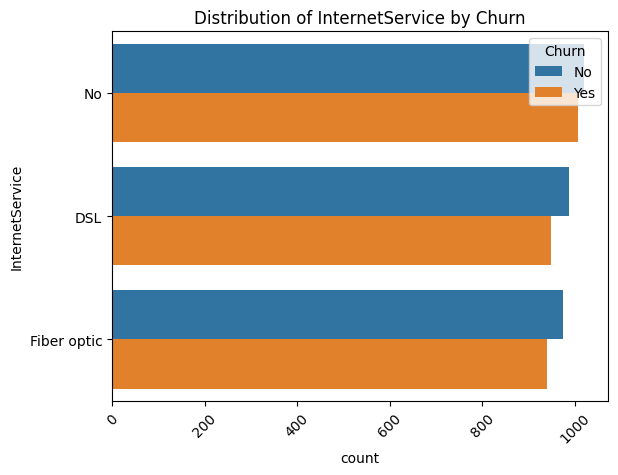

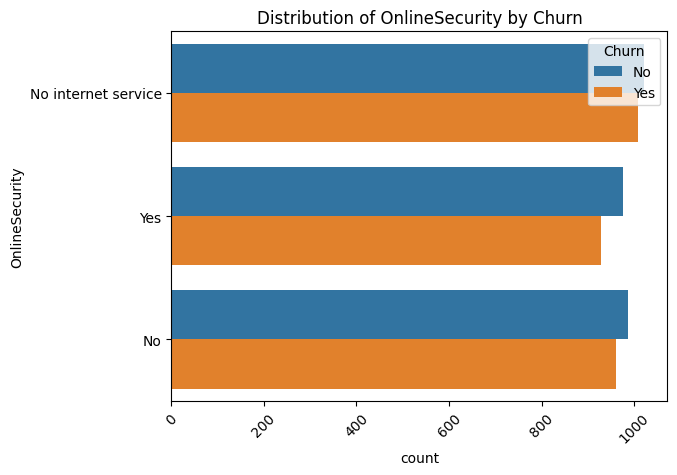

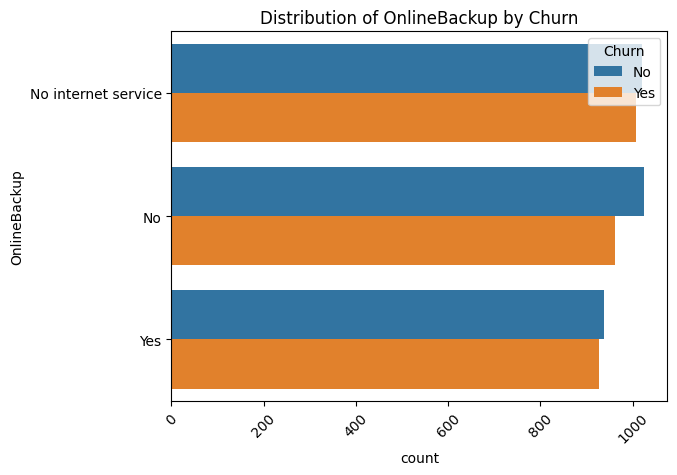

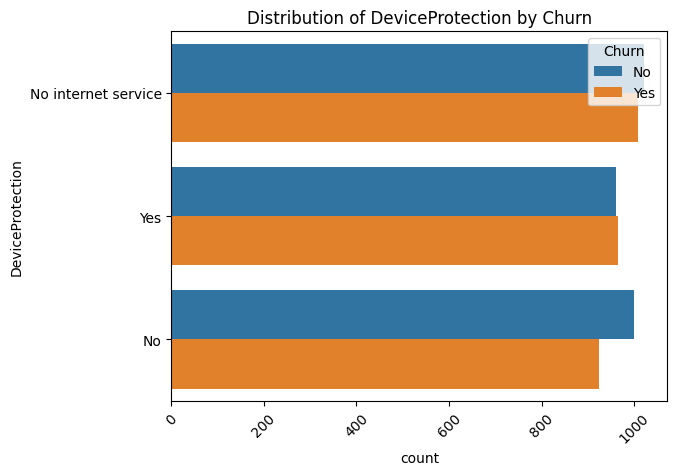

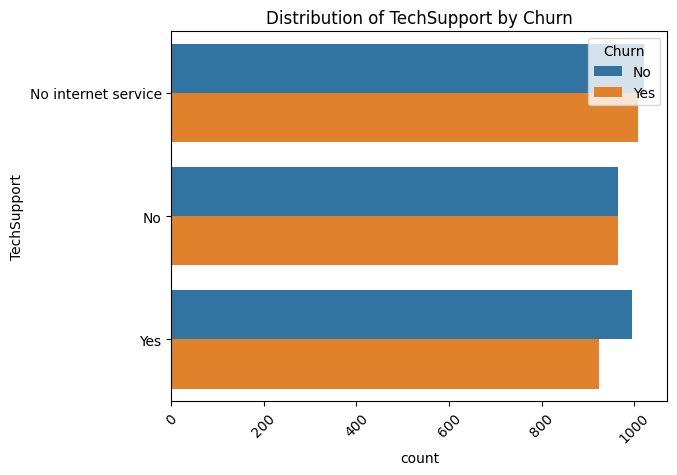

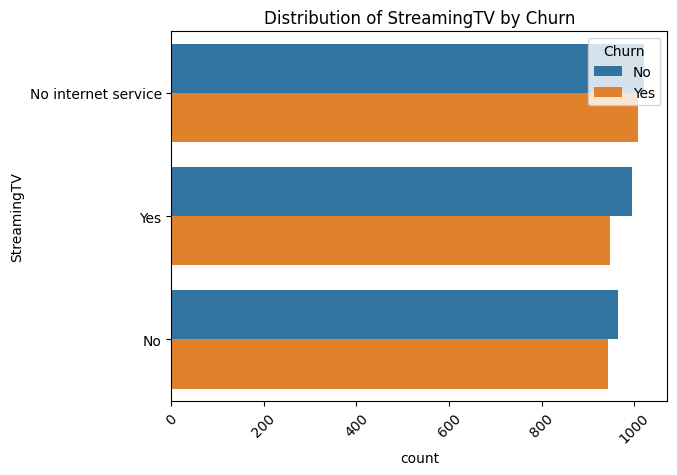

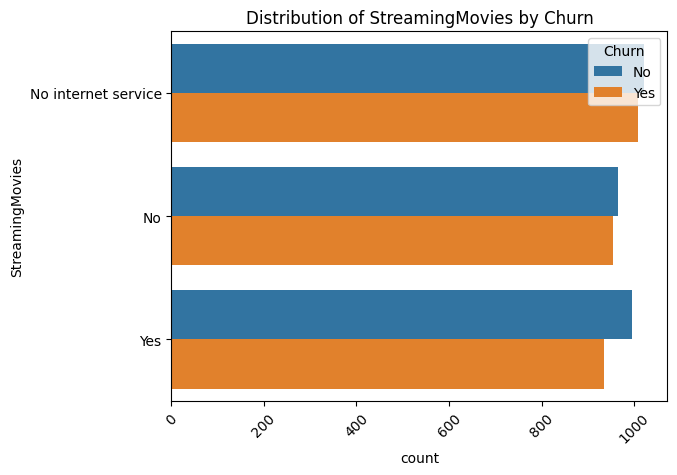

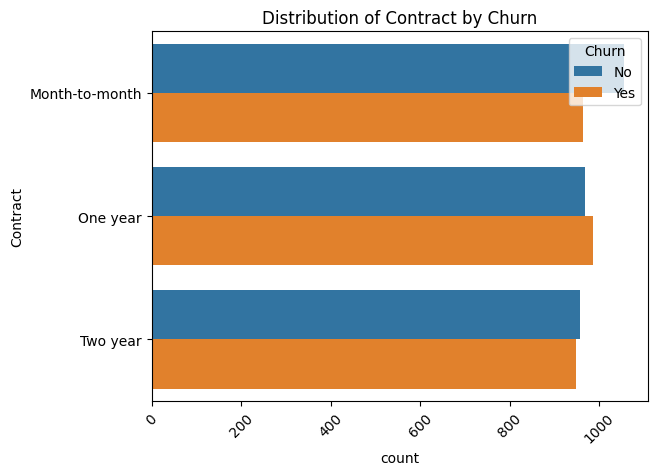

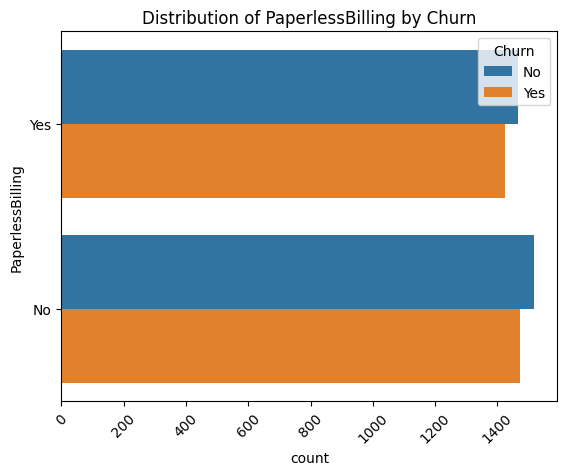

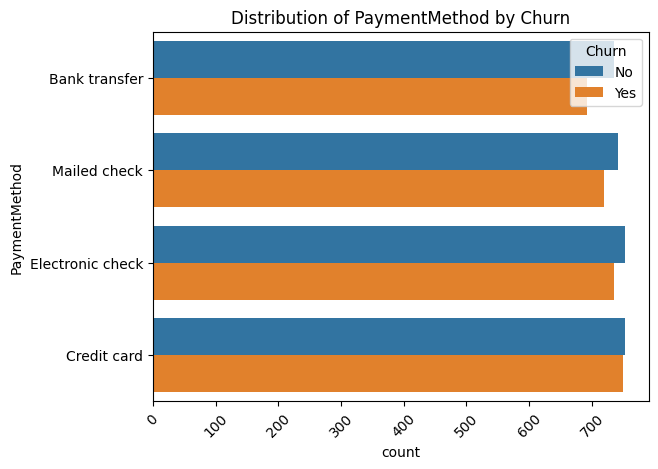

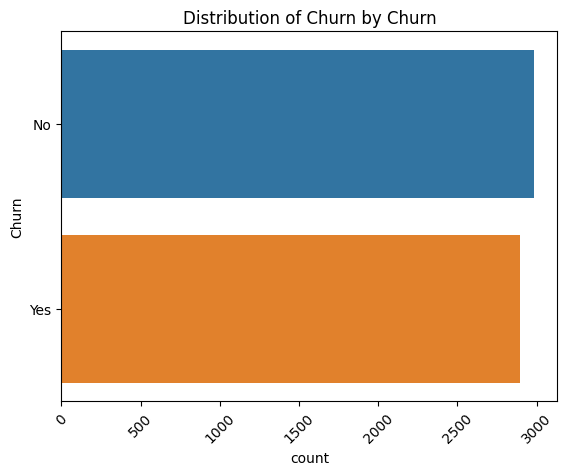

In [176]:
# Identifying categorical columns excluding 'customerID'
cat_cols = df.select_dtypes(include=['object']).columns.drop('customerID')

for col in cat_cols:
    plt.Figure(figsize=(8,5))
    sns.countplot(y=col, data=df, hue='Churn')
    plt.title(f"Distribution of {col} by Churn")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Convert TotalCharges to numeric (pd.to_numeric(errors="coerce")

churn_pred_copy['TotalCharges'] = pd.to_numeric(churn_pred_copy['TotalCharges'], errors='coerce')
churn_pred_copy["TotalCharges"].isna().sum()

np.int64(0)

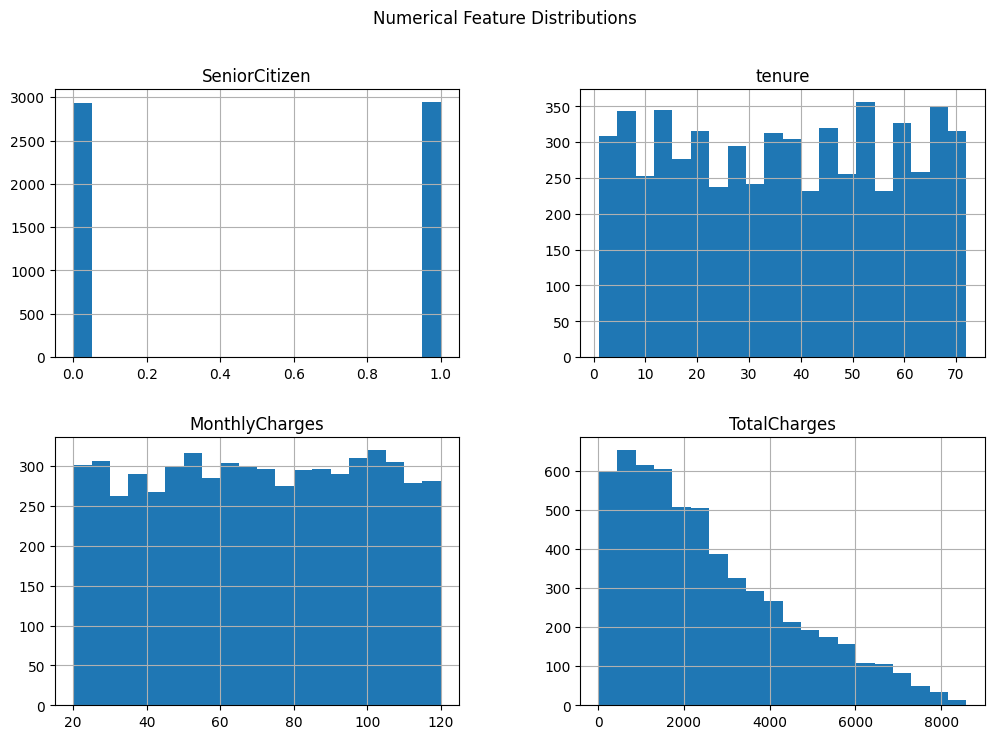

In [177]:
# indentifying numerical columns
nums_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[nums_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

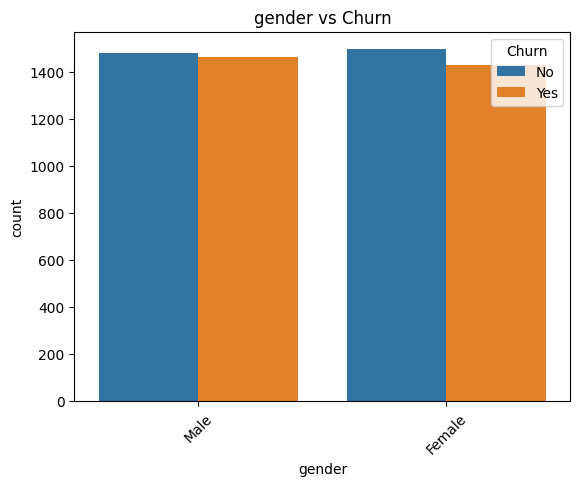

Churn         No       Yes
gender                    
Female  0.511263  0.488737
Male    0.503051  0.496949


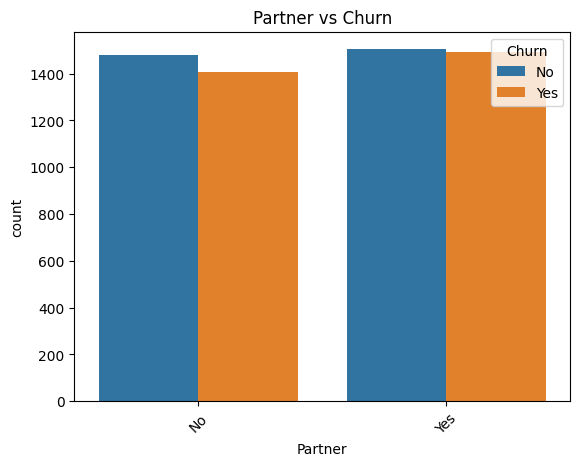

Churn          No       Yes
Partner                    
No       0.512305  0.487695
Yes      0.502170  0.497830


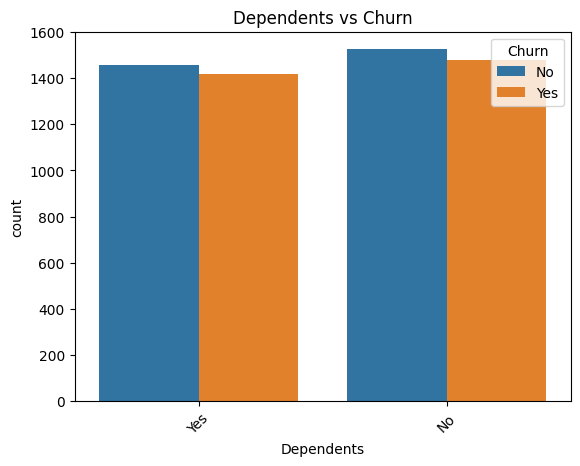

Churn             No       Yes
Dependents                    
No          0.507656  0.492344
Yes         0.506606  0.493394


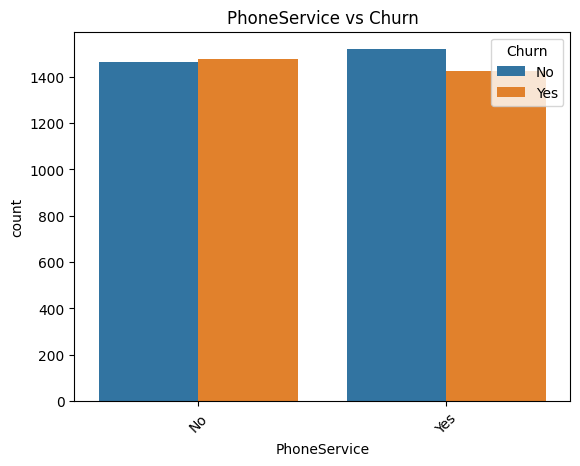

Churn               No       Yes
PhoneService                    
No            0.498129  0.501871
Yes           0.516151  0.483849


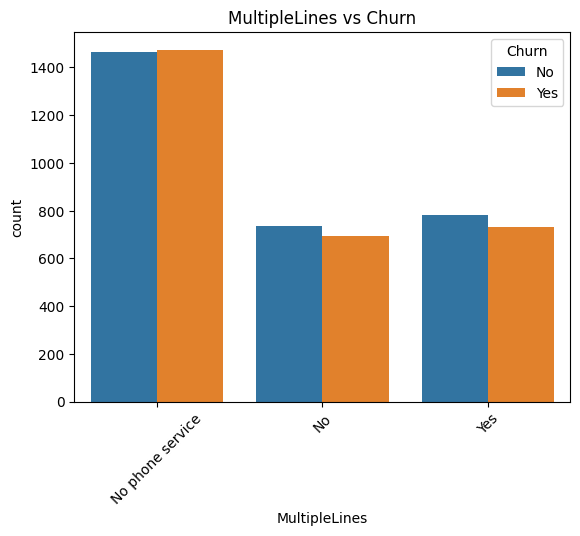

Churn                   No       Yes
MultipleLines                       
No                0.515745  0.484255
No phone service  0.498129  0.501871
Yes               0.516534  0.483466


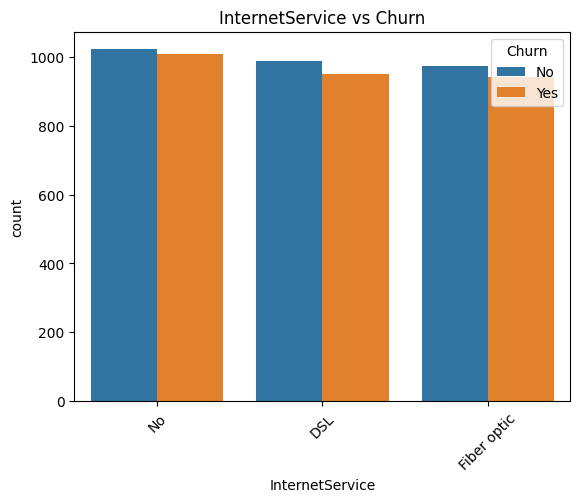

Churn                  No       Yes
InternetService                    
DSL              0.509814  0.490186
Fiber optic      0.508616  0.491384
No               0.503204  0.496796


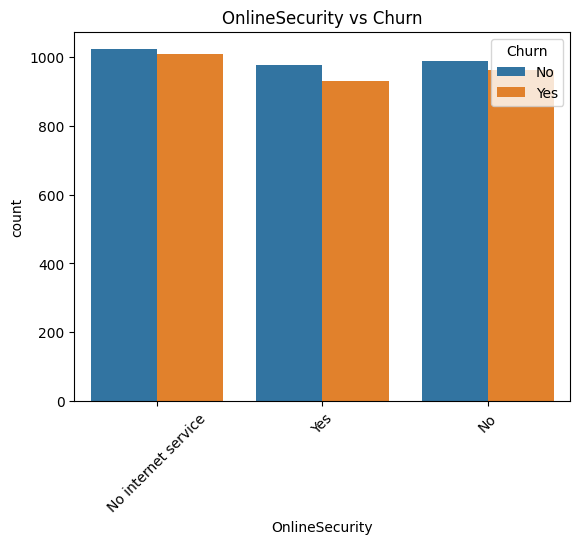

Churn                      No       Yes
OnlineSecurity                         
No                   0.506420  0.493580
No internet service  0.503204  0.496796
Yes                  0.512080  0.487920


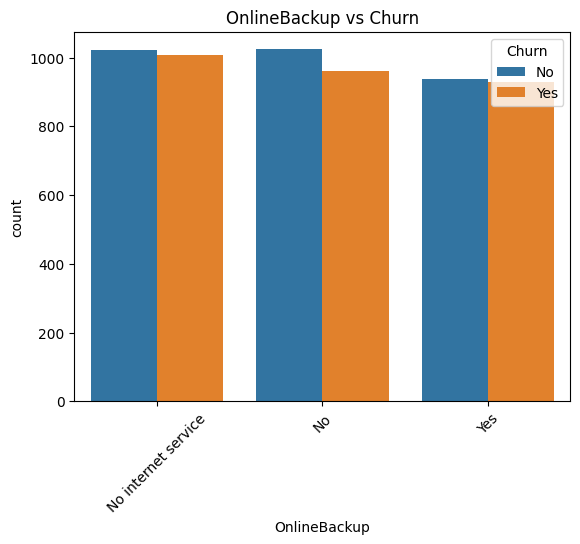

Churn                      No       Yes
OnlineBackup                           
No                   0.515609  0.484391
No internet service  0.503204  0.496796
Yes                  0.502413  0.497587


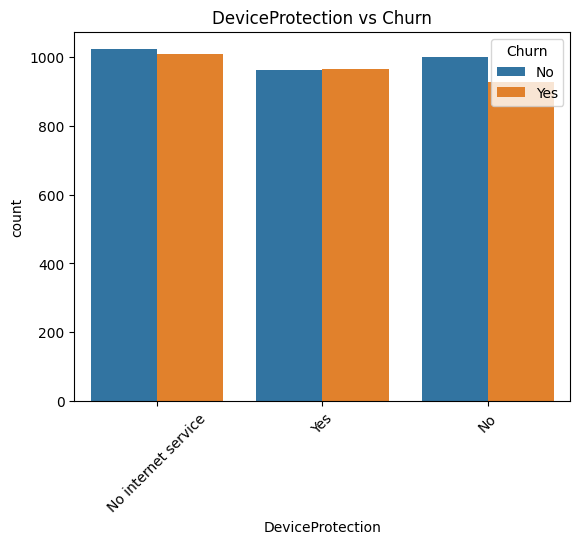

Churn                      No       Yes
DeviceProtection                       
No                   0.519481  0.480519
No internet service  0.503204  0.496796
Yes                  0.498962  0.501038


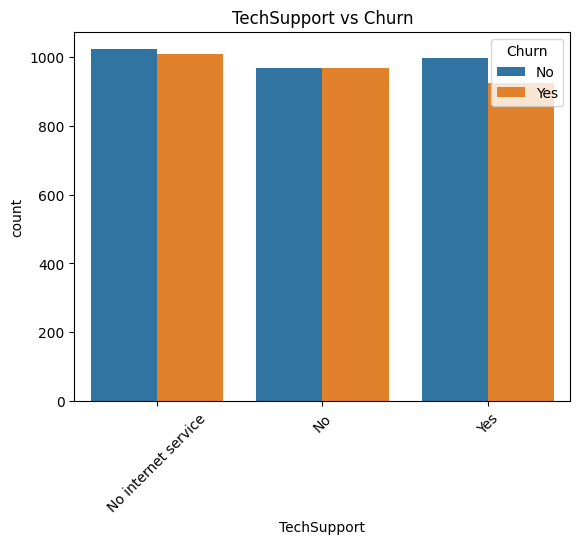

Churn                      No       Yes
TechSupport                            
No                   0.500000  0.500000
No internet service  0.503204  0.496796
Yes                  0.518499  0.481501


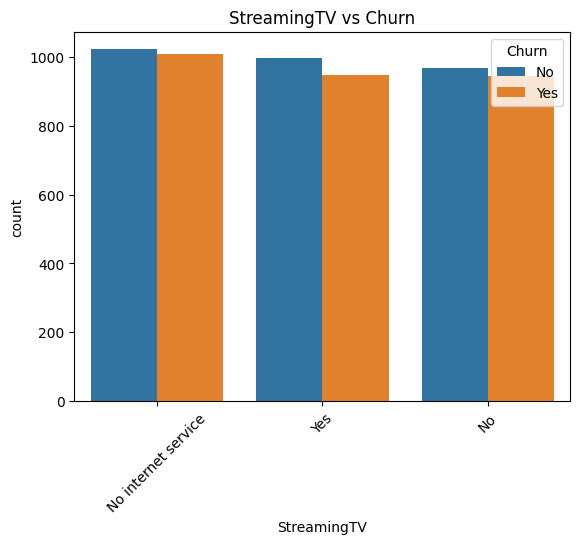

Churn                      No       Yes
StreamingTV                            
No                   0.506024  0.493976
No internet service  0.503204  0.496796
Yes                  0.512358  0.487642


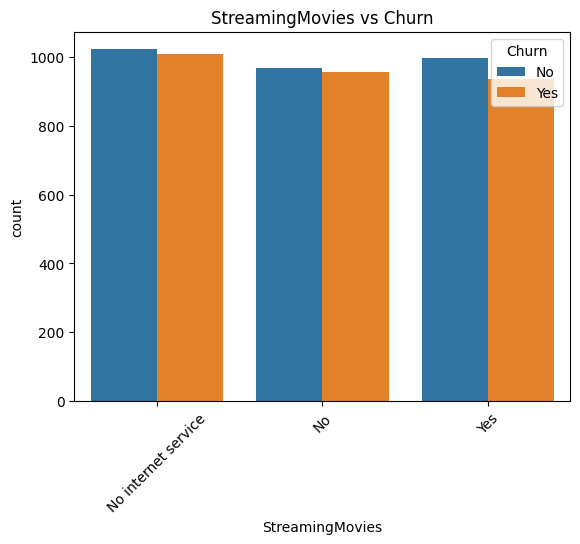

Churn                      No       Yes
StreamingMovies                        
No                   0.503125  0.496875
No internet service  0.503204  0.496796
Yes                  0.515277  0.484723


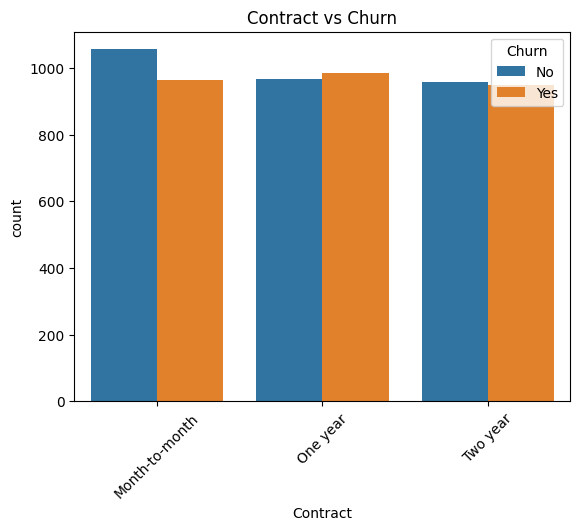

Churn                 No       Yes
Contract                          
Month-to-month  0.522772  0.477228
One year        0.495394  0.504606
Two year        0.502623  0.497377


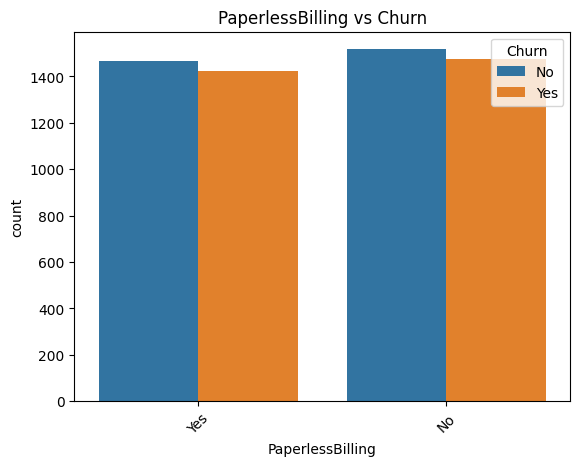

Churn                   No       Yes
PaperlessBilling                    
No                0.507358  0.492642
Yes               0.506920  0.493080


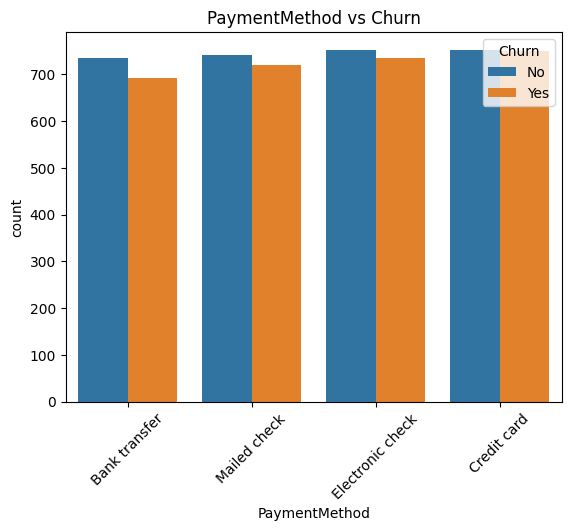

Churn                   No       Yes
PaymentMethod                       
Bank transfer     0.515067  0.484933
Credit card       0.500998  0.499002
Electronic check  0.505376  0.494624
Mailed check      0.507524  0.492476


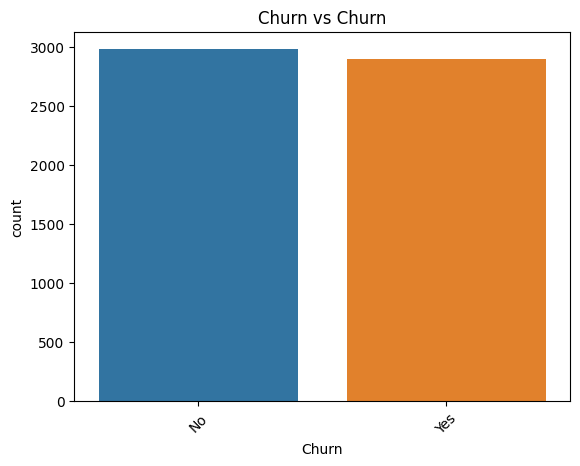

Churn   No  Yes
Churn          
No     1.0  0.0
Yes    0.0  1.0


In [178]:
# categorical vs churn

for col in cat_cols:
    plt.Figure(figsize= (6,4))
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

    print(pd.crosstab(df[col], df['Churn'], normalize='index'))

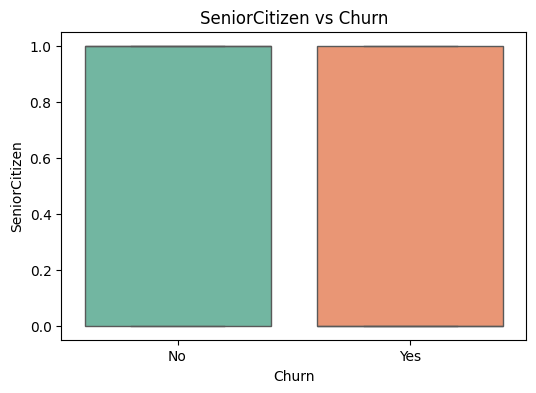

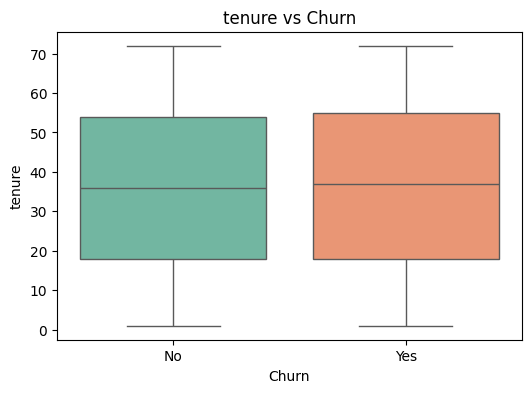

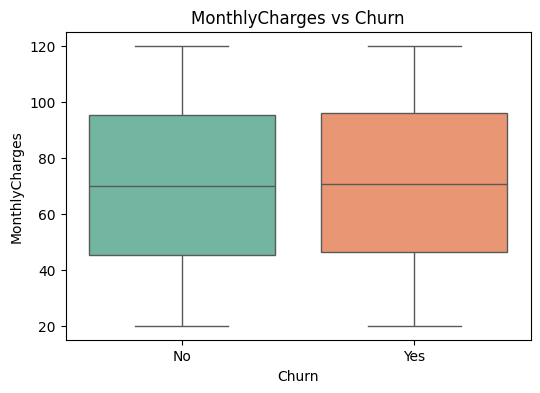

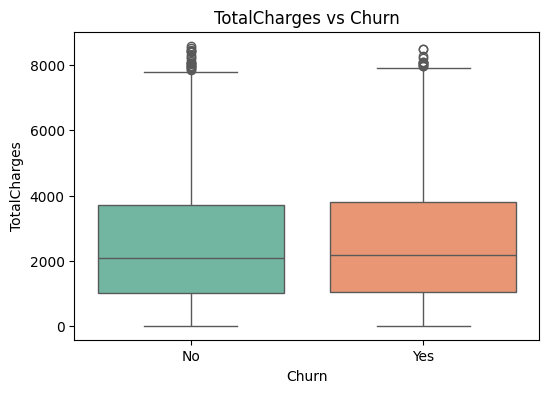

In [179]:
# Numerical vs churn

for col in nums_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.show()

    #print(pd.crosstab(df[col], df['Churn'], normalize='index'))

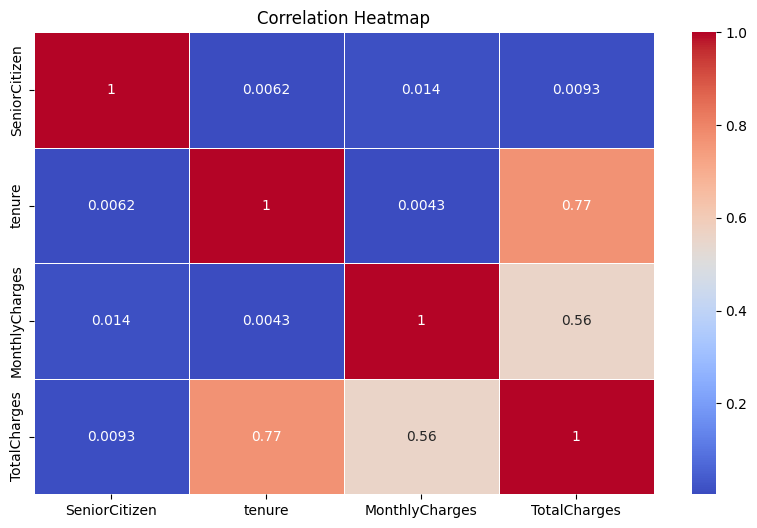

In [180]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df[nums_cols].corr(), annot=True, linewidths=0.5,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Churn
No     50.714286
Yes    49.285714
Name: proportion, dtype: float64


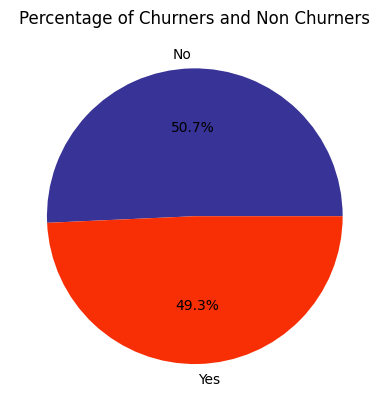

In [181]:
# percentage of Churners and Non Churners
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentage)
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', colors=["#383396", "#f82e05"])
plt.title("Percentage of Churners and Non Churners")
plt.show()

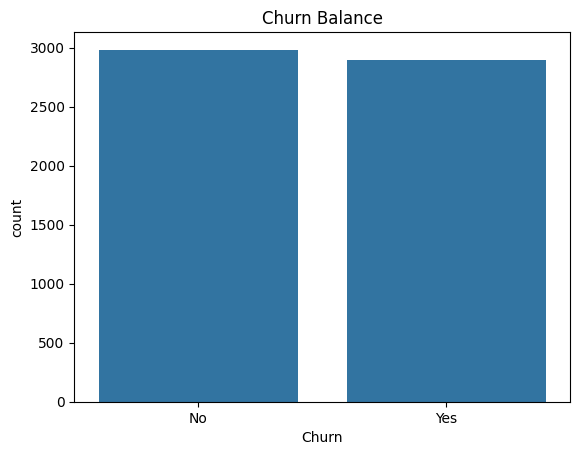

Churn rate: Churn
No     0.507143
Yes    0.492857
Name: proportion, dtype: float64


In [182]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Balance")
plt.show()

churn_rate = df["Churn"].value_counts(normalize=True)
print("Churn rate:", churn_rate)

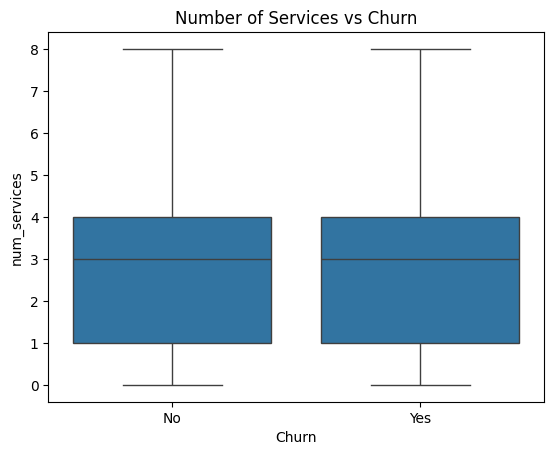

In [183]:
# Service count: how many "Yes" services a customer has
service_cols = ["PhoneService", "MultipleLines", "InternetService", 
                "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                "TechSupport", "StreamingTV", "StreamingMovies"]

df["num_services"] = df[service_cols].apply(lambda row: sum(row == "Yes"), axis=1)

sns.boxplot(x="Churn", y="num_services", data=df)
plt.title("Number of Services vs Churn")
plt.show()